<a href="https://colab.research.google.com/github/BBMRI-ERIC/ISO23494-PROV-demonstrator/blob/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/fullProvChainBiobanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# INSTALL PACKAGES
#
!pip install prov

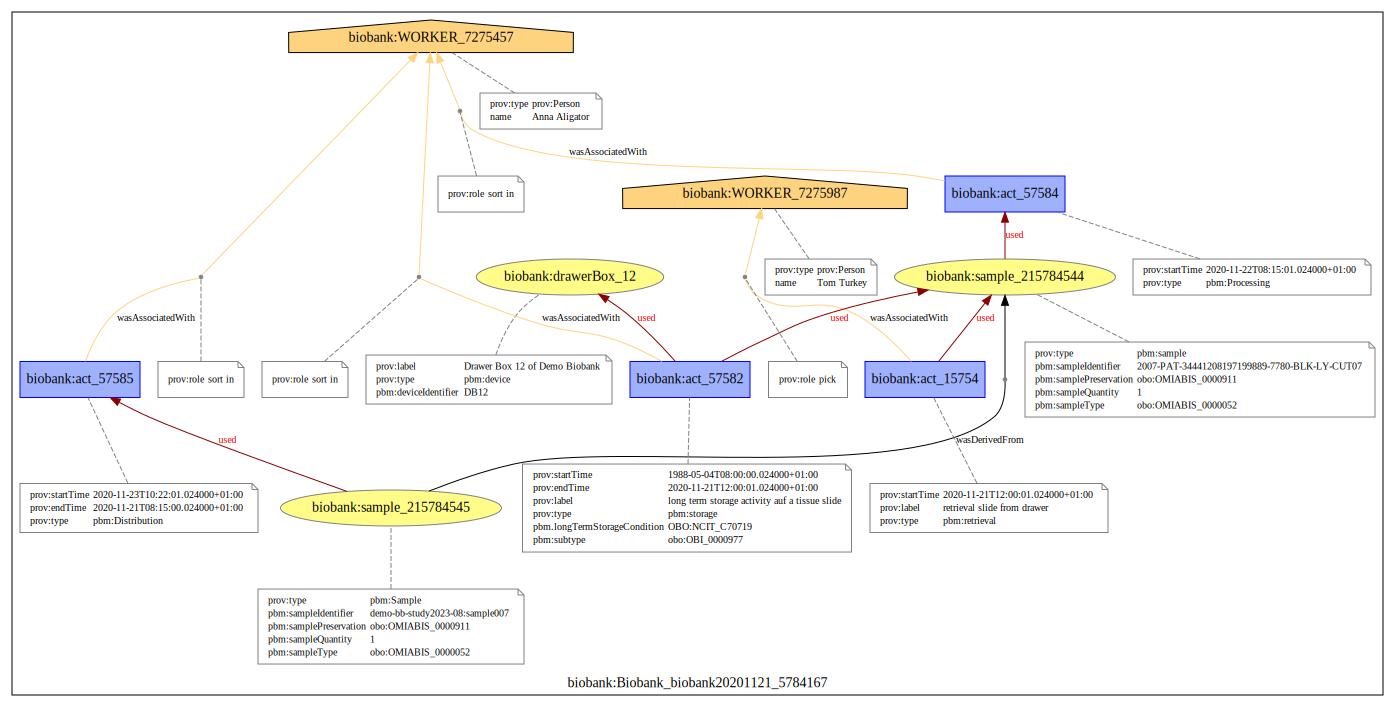

In [60]:
import prov.model as prov
import json

from prov.dot import prov_to_dot
from IPython.display import SVG

document = prov.ProvDocument()

document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/Biobank')
document.add_namespace('cpim', 'http://cpim.org/')
document.add_namespace('cpm', 'http://part2-common-provenance-model.ISO-23494.org/')
document.add_namespace('pbm', 'http://part3-provenance-of-biological-material.ISO-23494.org/')
document.add_namespace('obo', 'http://purl.obolibrary.org/obo/')
document.add_namespace('biobank', 'http://demo-biobank.org/')
document.add_namespace('hospital', 'http://demo-hospital.org/')

######################Biobank_delivery20201121_5784167######################
biobank20201121_5784167 = document.bundle('biobank:Biobank_biobank20201121_5784167')
document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167')

###################### Actors in Biobank ######################
biobank20201121_5784167.agent('biobank:WORKER_7275457', {prov.PROV_TYPE: 'prov:Person', 'name': "Anna Aligator"})
biobank20201121_5784167.agent('biobank:WORKER_7275987', {prov.PROV_TYPE: 'prov:Person', 'name': "Tom Turkey"})

################### Sample, delivered to researcher ######################
sample_215784545 = biobank20201121_5784167.entity('biobank:sample_215784545', (
    (prov.PROV_TYPE, "pbm:Sample"),
    ('pbm:sampleIdentifier', "demo-bb-study2023-08:sample007"),
    ('pbm:sampleType', "obo:OMIABIS_0000052"),
    ('pbm:samplePreservation', "obo:OMIABIS_0000911"),
    ('pbm:sampleQuantity', "1")
    ))

biobank20201121_5784167.activity('biobank:act_57585', '2020-11-23T10:22:01.024000+01:00','2020-11-21T08:15:00.024000+01:00', {prov.PROV_TYPE: "pbm:Distribution"})
biobank20201121_5784167.wasAssociatedWith('biobank:act_57585', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
biobank20201121_5784167.used('biobank:sample_215784545','biobank:act_57585' )

################### Same sample with the barcode used in the Biobank  ######################

sample_215784544 = biobank20201121_5784167.entity('biobank:sample_215784544', (
    (prov.PROV_TYPE, "pbm:sample"),
    ('pbm:sampleIdentifier', "2007-PAT-34441208197199889-7780-BLK-LY-CUT07"),
    ('pbm:sampleType', "obo:OMIABIS_0000052"),
    ('pbm:samplePreservation', "obo:OMIABIS_0000911"),
    ('pbm:sampleQuantity', "1")
    ))

biobank20201121_5784167.wasDerivedFrom('biobank:sample_215784545' ,'biobank:sample_215784544')

#Relabeling
biobank20201121_5784167.activity('biobank:act_57584', '2020-11-22T08:15:01.024000+01:00', None, {prov.PROV_TYPE: "pbm:Processing"})
biobank20201121_5784167.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
biobank20201121_5784167.used('biobank:sample_215784544','biobank:act_57584' )

#Retrieval from Biobank

biobank20201121_5784167.activity('biobank:act_15754', '2020-11-21T12:00:01.024000+01:00',None, 
                                { prov.PROV_TYPE: "pbm:retrieval",
                                  'prov:label':'retrieval slide from drawer'
                                }
                                )


biobank20201121_5784167.wasAssociatedWith('biobank:act_15754', 'biobank:WORKER_7275987',None,None, {prov.PROV_ROLE: "pick"})
biobank20201121_5784167.used('biobank:act_15754','biobank:sample_215784544',)

#Storing in Biobank


drawerBox_12 = biobank20201121_5784167.entity('biobank:drawerBox_12', (
      (prov.PROV_TYPE, "pbm:device"),
       ('prov:label','Drawer Box 12 of Demo Biobank'),                             
       ('pbm:deviceIdentifier', "DB12")
       ))


biobank20201121_5784167.activity('biobank:act_57582', '1988-05-04T08:00:00.024000+01:00','2020-11-21T12:00:01.024000+01:00', 
                                { prov.PROV_TYPE: "pbm:storage",
                                  'prov:label':'long term storage activity auf a tissue slide',
                                  'pbm:subtype': "obo:OBI_0000977",                 # Paraffin Storage  
                                  'pbm.longTermStorageCondition': "OBO:NCIT_C70719" # Specimen at Room Temperature
                                }
                                )
biobank20201121_5784167.wasAssociatedWith('biobank:act_57582', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
biobank20201121_5784167.used('biobank:act_57582', 'biobank:sample_215784544' )
biobank20201121_5784167.used('biobank:act_57582','biobank:drawerBox_12')


document.get_provn() # =>

provn = document.serialize(format='provn')
#print(provn)

dotrep =   prov_to_dot(document)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)
